# Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Compare the different standardization and normalization techniques
* Use standardization/normalization on features of a dataset

## Back to the Ames Housing data

Let's import our Ames Housing data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

ames = pd.read_csv('ames.csv')

## Look at the histograms for the continuous variables

Since there are so many features it is helpful to filter the columns by datatype and number of unique values. A heuristic you might use to select continous variables might be a combination of features that are not object datatypes and have at least a certain amount of unique values.

In [2]:
cont_ames = ames.select_dtypes(include=['int64', 'float64'], exclude=object)

In [3]:
cont_ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

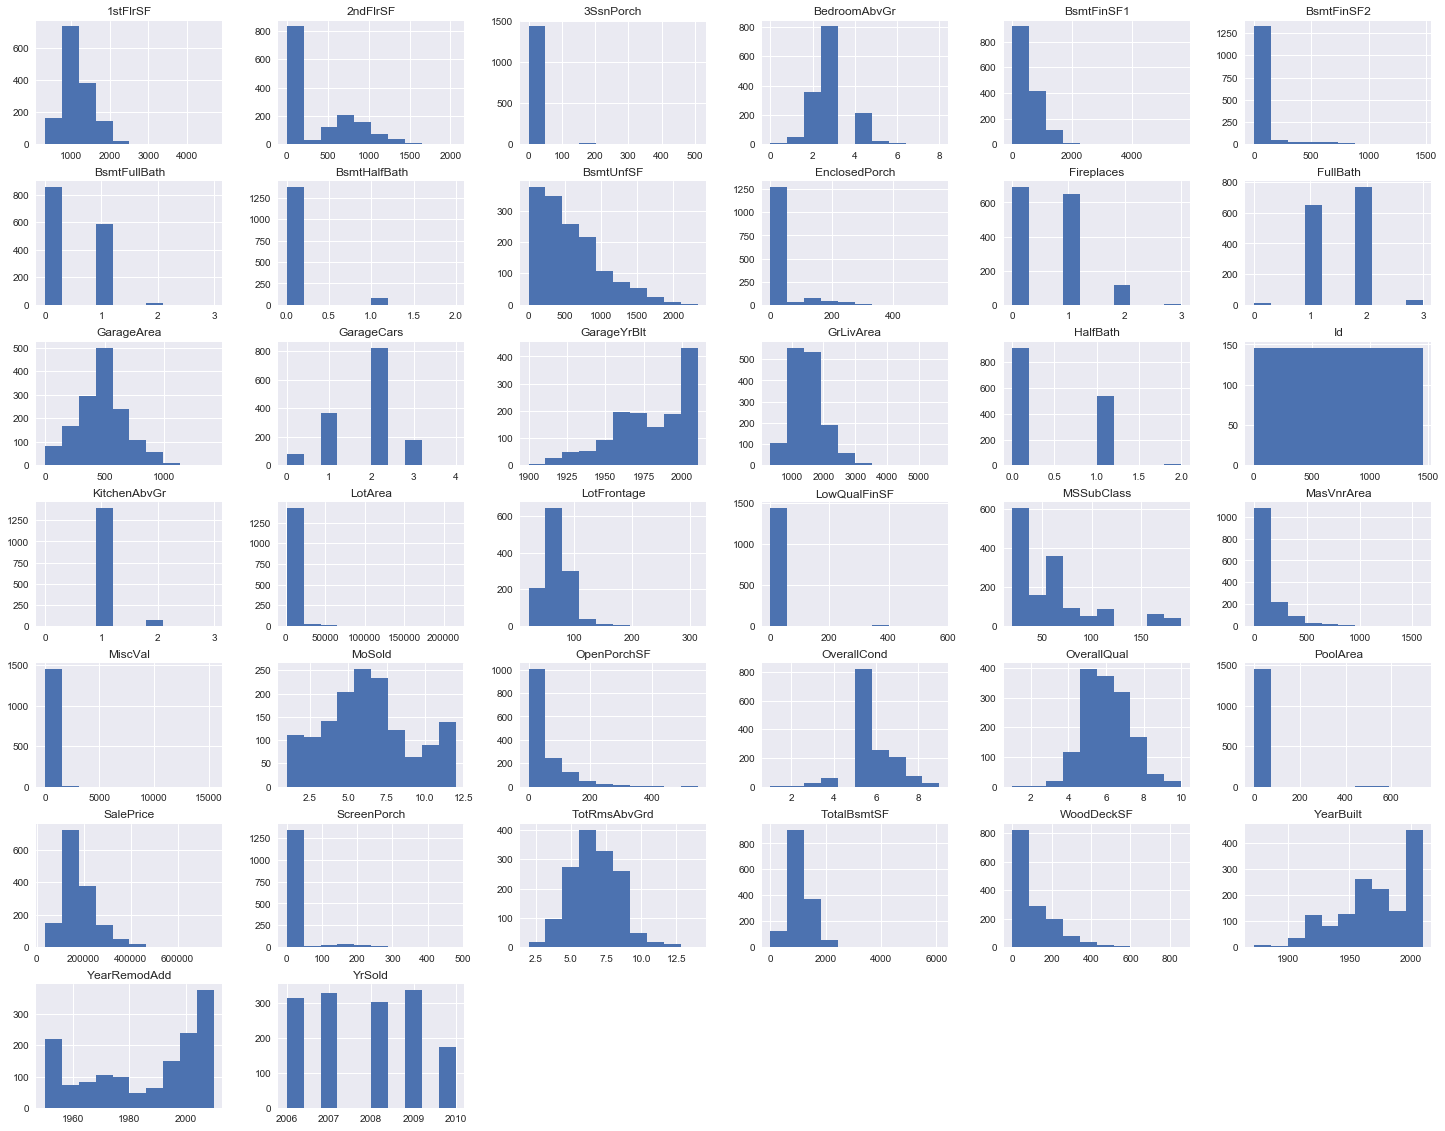

In [4]:
cont_ames.hist(figsize=(25,20))
plt.show()

We can see from our histogram of the contiuous features that there are many examples where there are a ton of zeros. For example, WoodDeckSF (square footage of a wood deck) gives us a positive number indicating the size of the deck and zero if no deck exists. It might have made sense to categorize this variable to "deck exists or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

Lets drop these zero-inflated variables for now and select the features which don't have this characteristic.

In [18]:
# Select non zero-inflated continuous features as ames_cont
cont_vars = list(cont_ames.columns)
vars_to_remove = ['HalfBath', 'BsmtFullBath', 'Fireplaces', '3SsnPorch', 'BsmtHalfBath', '2ndFlrSF',
                  'BsmtFinSF2', 'BsmtFinSF1', 'MiscVal', 'PoolArea', 'WoodDeckSF', 'ScreenPorch', 
                  'OpenPorchSF', 'MasVnrArea', 'EnclosedPorch', 'BsmtHallBath', 'LowQualFinSF', 'BsmtUnfSF']
for i in vars_to_remove:
    if i in cont_vars:
        cont_vars.remove(i)
ames_cont = cont_ames.loc[:,[i for i in cont_vars]]

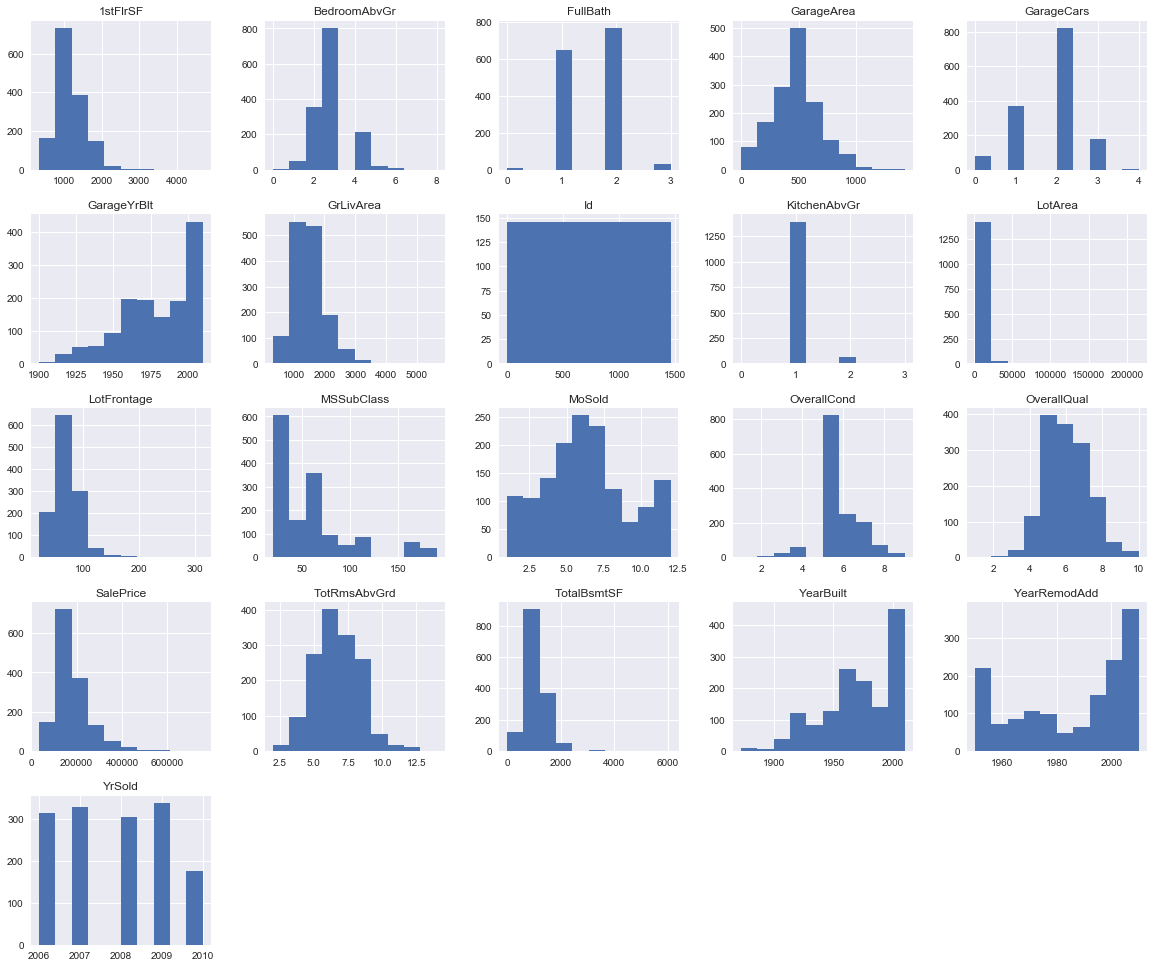

In [19]:
ames_cont.hist(figsize=(20,17))
plt.show()

## Perform log transformations for the variables where it makes sense

In [12]:
ames_cont.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold',
       'SalePrice'],
      dtype='object')

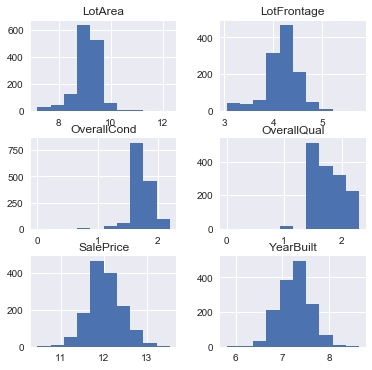

In [20]:
import numpy as np
data_log = pd.DataFrame([])
data_log['YearBuilt'] = np.log(ames_cont['GrLivArea'])
data_log['SalePrice'] = np.log(ames_cont['SalePrice'])
data_log['LotFrontage'] = np.log(ames_cont['LotFrontage'])
data_log['LotArea'] = np.log(ames_cont['LotArea'])
data_log['OverallCond'] = np.log(ames_cont['OverallCond'])
data_log['OverallQual'] = np.log(ames_cont['OverallQual'])
data_log.hist(figsize  = [6, 6]);

## Standardize the continuous variables

Store your final features in a DataFrame `features_final`: 

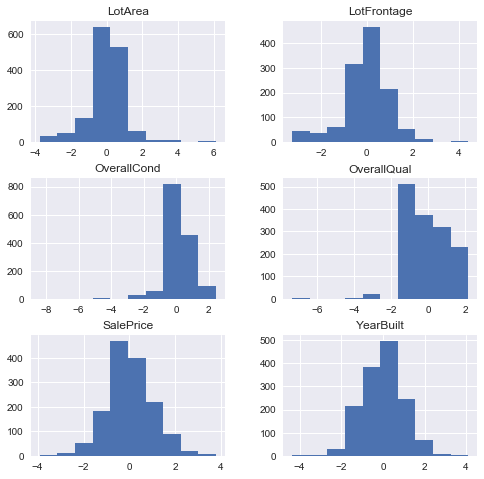

In [23]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

features_final = data_log.apply(normalize)

features_final.hist(figsize  = [8, 8]);

## Summary
Great! You've now got some hands-on practice transforming data using log transforms, feature scaling, and normalization!